In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

In [3]:
dataset =pd.read_csv('caravan-insurance-challenge.csv', sep=',')
dataset.shape
# dataset

(9822, 86)

In [4]:
pd.options.display.float_format = "{:.6f}".format
dataset.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.031460,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.209070,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000


In [5]:
dataset.groupby('CARAVAN').size()

CARAVAN
0    9236
1     586
dtype: int64

In [6]:
print('Negatif', round(dataset['CARAVAN'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Positif', round(dataset['CARAVAN'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

Negatif 94.03 % of the dataset
Positif 5.97 % of the dataset


In [7]:
negatif_data = dataset.loc[dataset['CARAVAN']==0]
positif_data = dataset.loc[dataset['CARAVAN']==1]

all_data = pd.concat([negatif_data, positif_data])
all_data.shape

X = all_data.drop('CARAVAN', axis=1)
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X = st.fit_transform(X)
y = all_data['CARAVAN']

C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2 ,random_state=42)


print ("Rincian class pada data training {} dan testing {} " .format(Counter(y_train), Counter(y_test)))
print (X_train.shape)
print(X_test.shape)

Rincian class pada data training Counter({0: 7394, 1: 463}) dan testing Counter({0: 1842, 1: 123}) 
(7857, 85)
(1965, 85)


In [9]:
svm = SVC(gamma=1.5, kernel='rbf', C=1)
svm.fit(X_train,y_train)
X_train.shape

(7857, 85)

In [10]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_train)
conf_matrix_train = confusion_matrix(y_train, y_pred)
print (conf_matrix_train)
# print (X.shape)
print (classification_report(y_train, y_pred))
G_mean = geometric_mean_score(y_train, y_pred)
print (G_mean)

[[7393    1]
 [ 121  342]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7394
           1       1.00      0.74      0.85       463

   micro avg       0.98      0.98      0.98      7857
   macro avg       0.99      0.87      0.92      7857
weighted avg       0.98      0.98      0.98      7857

0.8593957220546844


In [11]:
y_pred_test = svm.predict(X_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print (conf_matrix_test)
# print (X.shape)
print (classification_report(y_test, y_pred_test))
G_mean_test = geometric_mean_score(y_test, y_pred_test)
print (G_mean_test)

[[1829   13]
 [ 122    1]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1842
           1       0.07      0.01      0.01       123

   micro avg       0.93      0.93      0.93      1965
   macro avg       0.50      0.50      0.49      1965
weighted avg       0.88      0.93      0.90      1965

0.08984822133390236


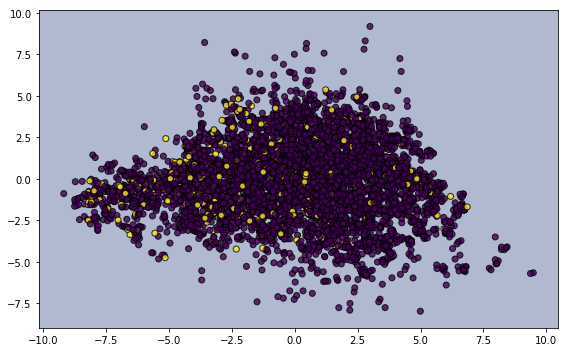

In [12]:
from sklearn.decomposition import PCA

fig, ax = plt.subplots(1,figsize=(8,5))

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X_train)

classifier = svm.fit(Xreduced, y_train)
plot_decision_function(Xreduced,y_train, classifier, ax)
fig.tight_layout()

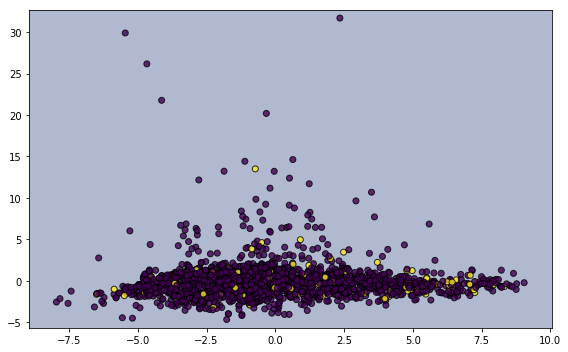

In [13]:
from sklearn.decomposition import PCA

fig, ax = plt.subplots(1,figsize=(8,5))

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X_test)

classifier = svm.fit(Xreduced, y_test)
plot_decision_function(Xreduced,y_test, classifier, ax)
fig.tight_layout()